# Hypothesis Testing: Installs vs Rating

## Hypothesis:

__Null Hypothesis (Ho): There is no significant difference between the number of installs an App has and its rating.__

__Alternative Hypothesis (Ha): There is a significant difference between the number of installs an App has and its rating.__

## Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime, date
import scipy.stats as stats
import math
import nbimporter
from Helper_Functions import *

%matplotlib inline
sns.set(style = 'darkgrid')

In [27]:
play_store_data = pd.read_csv('../Data/Cleaned_Play_Store_Data.csv')
# Dropping Unnamed Columns
play_store_data.drop(play_store_data.columns[
    play_store_data.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [28]:
play_store_data.head()

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Cost,Content_Rating,Last_Updated,Latest_Version,Days_Since_Update
0,Peapod,SHOPPING,3.656329,1967,100000,1400000.0,0.0,Free,Everyone,2018-09-20,2.2,196
1,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154,10000000,16000000.0,0.0,Free,Everyone,2019-03-22,4.1,13
2,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559,100000,23000000.0,0.0,Free,Everyone,2019-03-29,7.6,6
3,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85,10000,4100000.0,0.0,Free,Everyone,2019-02-10,2.4,53
4,FreshDirect,LIFESTYLE,3.213528,754,100000,39000000.0,0.0,Free,Everyone,2019-03-27,6.7,8


## Creating Data Frames to Match Hypothesis Testing

In [116]:
# I want to compare Install ranges that are comparible in size
# Thus, I create a groupby that returns the Install ranges with their respective counts
play_store_data.groupby('Installs').count()

Ttest_indResult(statistic=0.010879311318583636, pvalue=0.9913197832078648)

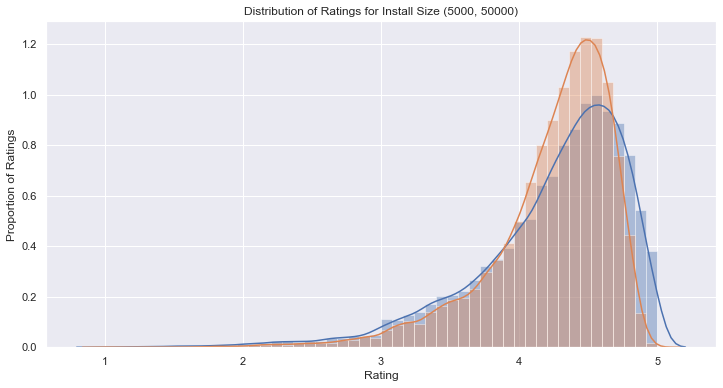

In [117]:
# Comparing Install Sizes of 5000 & 50000, to compare proportion of ratings
downloads_5000 = play_store_data[play_store_data['Installs'] == 5000]
downloads_50000 = play_store_data[play_store_data['Installs'] == 50000]

fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_5000.Rating, label = "Installs = 5000")
sns.distplot(downloads_50000.Rating, label = 'Installs = 50000')
plt.ylabel('Proportion of Ratings')
plt.title('Distribution of Ratings for Install Size (5000, 50000)')
stats.ttest_ind(downloads_5000.Rating, downloads_50000.Rating, equal_var=False)

Ttest_indResult(statistic=-0.6889699772794496, pvalue=0.49084598489652564)

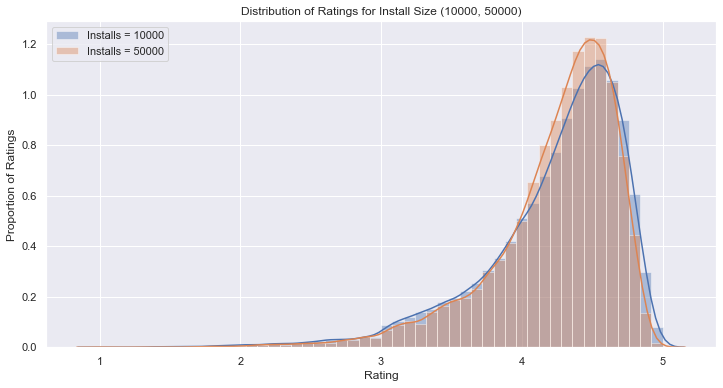

In [118]:
# Comparing Install Sizes of 10000 & 50000, to compare proportion of ratings
downloads_100 = play_store_data[play_store_data['Installs'] == 10000]
downloads_500 = play_store_data[play_store_data['Installs'] == 50000]

fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_100.Rating,label='Installs = 10000')
sns.distplot(downloads_500.Rating,label='Installs = 50000')
plt.legend()
plt.ylabel('Proportion of Ratings')
plt.title('Distribution of Ratings for Install Size (10000, 50000)')
stats.ttest_ind(downloads_100.Rating, downloads_500.Rating, equal_var=False)

Ttest_indResult(statistic=-0.6889699772794496, pvalue=0.49084598489652564)

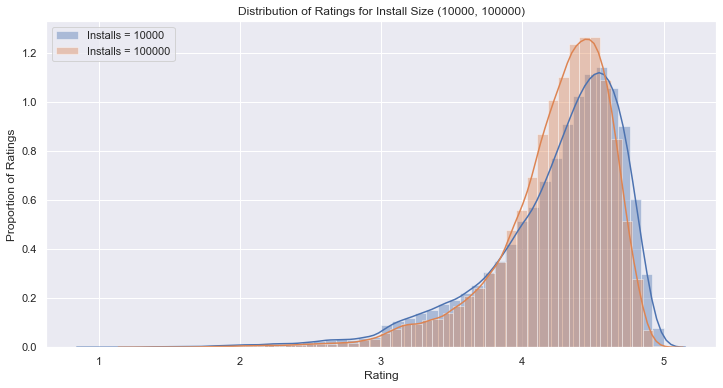

In [119]:
# Comparing Install Sizes of 10000 & 100000, to compare proportion of ratings
downloads_10000 = play_store_data[play_store_data['Installs'] == 10000]
downloads_100000 = play_store_data[play_store_data['Installs'] == 100000]

fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(downloads_10000.Rating,label = 'Installs = 10000')
sns.distplot(downloads_100000.Rating,label = 'Installs = 100000')

plt.legend()
plt.title('Distribution of Ratings for Install Size (10000, 100000)')
plt.ylabel('Proportion of Ratings')
stats.ttest_ind(downloads_100.Rating, downloads_500.Rating, equal_var=False)